In [ ]:
#import necessary modules
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

##**Data Loading and Preparation**

In [ ]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#check for the null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#get the size of the dataset
df.shape

(303, 14)

In [ ]:
#separate the dataset into target variable and features
y = df['target']
X = df.iloc[:, 0:13]

In [ ]:
#splitting the dataset into train and test sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
columns = X_train.columns #storing the feature names as they will be required later

In [ ]:
#standardize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##**Feature Importance from Coefficients**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
feature_importance = pd.DataFrame(data={
    'Feature': columns,
    'Importance': lr.coef_[0]
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
2,cp,0.880190
10,slope,0.437782
6,restecg,0.389780
7,thalach,0.360813
5,fbs,0.031401
0,age,-0.026336
4,chol,-0.120712
3,trestbps,-0.219051
8,exang,-0.519162
12,thal,-0.606249


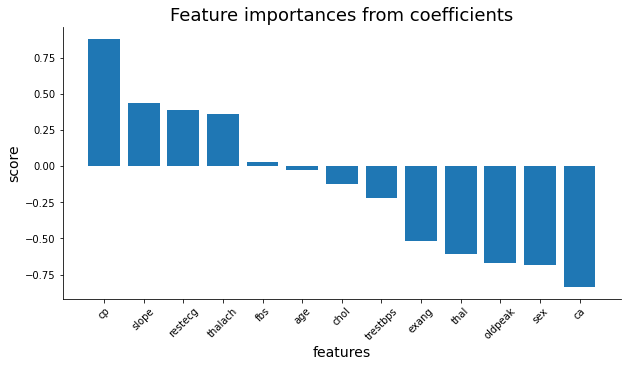

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(x=feature_importance['Feature'], height=feature_importance['Importance']),
plt.title('Feature importances from coefficients', size=18)
plt.ylabel("score", size=14)
plt.xlabel("features", size=14)
plt.xticks(rotation=45)
plt.show()

##**Feature Importance from Tree-Based Model**

###**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
feature_importance = pd.DataFrame(data={
    'Feature': columns,
    'Importance': dt.feature_importances_
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
11,ca,0.271725
12,thal,0.120732
9,oldpeak,0.114687
2,cp,0.114235
0,age,0.105556
4,chol,0.093243
7,thalach,0.059837
10,slope,0.059027
3,trestbps,0.038722
6,restecg,0.015888


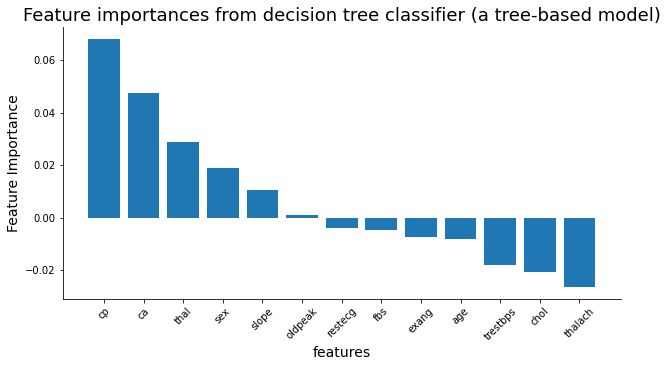

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(x=feature_importance['Feature'], height=feature_importance['Importance']),
plt.title('Feature importances from decision tree classifier (a tree-based model)', size=18)
plt.ylabel("Feature Importance", size=14)
plt.xlabel("features", size=14)
plt.xticks(rotation=45)
plt.show()

###**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train, y_train)
feature_importance = pd.DataFrame(data={
    'Feature': columns,
    'Importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
11,ca,0.148824
2,cp,0.123668
9,oldpeak,0.119188
7,thalach,0.099489
12,thal,0.094243
0,age,0.081119
3,trestbps,0.069986
4,chol,0.069953
8,exang,0.067412
10,slope,0.059496


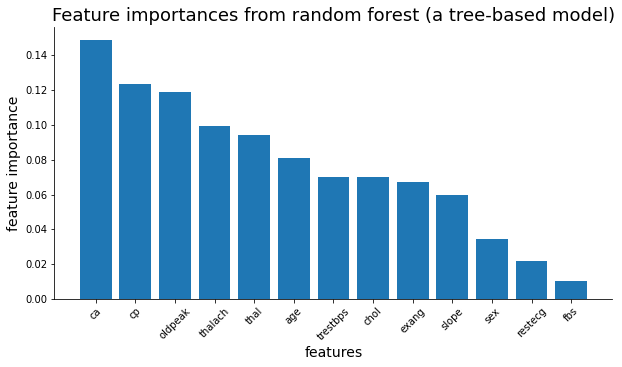

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(x=feature_importance['Feature'], height=feature_importance['Importance']),
plt.title('Feature importances from random forest (a tree-based model)', size=18)
plt.ylabel("feature importance", size=14)
plt.xlabel("features", size=14)
plt.xticks(rotation=45)
plt.show()

##**Permutation Based Feature Importance**

In [ ]:
from sklearn.inspection import permutation_importance

res = permutation_importance(rf, X_test, y_test, scoring='accuracy', n_repeats=30)

In [ ]:
res.importances_mean

array([-0.00833333,  0.01885965,  0.06798246, -0.01798246, -0.02061404,
       -0.00482456, -0.00394737, -0.02631579, -0.00745614,  0.00087719,
        0.01052632,  0.04736842,  0.02894737])

In [ ]:
feature_importance = pd.DataFrame(data={
    'Feature': columns,
    'Importance': res.importances_mean
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
2,cp,0.067982
11,ca,0.047368
12,thal,0.028947
1,sex,0.018860
10,slope,0.010526
9,oldpeak,0.000877
6,restecg,-0.003947
5,fbs,-0.004825
8,exang,-0.007456
0,age,-0.008333


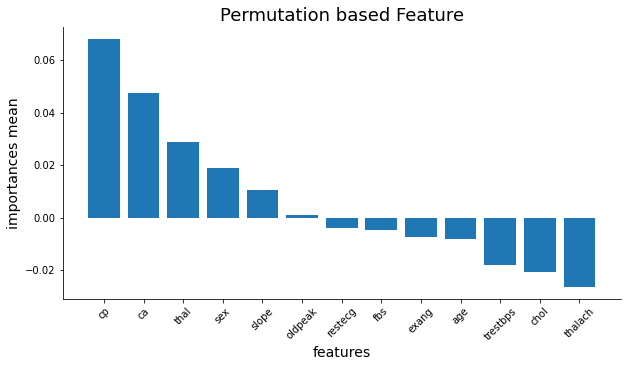

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(x=feature_importance['Feature'], height=feature_importance['Importance']),
plt.title('Permutation based Feature', size=18)
plt.ylabel("importances mean", size=14)
plt.xlabel("features", size=14)
plt.xticks(rotation=45)
plt.show()